In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето

>Сгенерируйте из него выборку объёма 1000

In [22]:
b = 2.62
pareto_rv = sts.pareto(b)
sample = sts.pareto.rvs(b, scale=0.8, size=1000)

>постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины

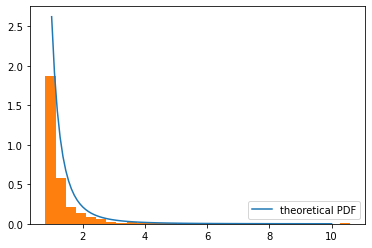

In [23]:
x = np.linspace(1, 10, 100)
pdf = pareto_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')


# я хз что такое normed, вот тут 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# такого параметра нет, юзаем density 
plt.hist(sample, bins=30, density=True)
plt.legend(loc='lower right')

> Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Согласно ЦПТ параметры распределения выборочного среднего будут $ N(\mu, \sigma^2/n)$, параметры распределения Парето в данно случае равны: $ \mu = \frac{b}{b - 1}; D = \sigma^2 = \left(\frac{1}{b - 1}\right)^2\frac{b}{b - 2}$, где  $ b = 2.62 $

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE

In [24]:
mean1 = b / (b - 1)
var1 = (1/(b - 1))**2 * (b/(b-2))
print(mean1, var1)

# scipy.stats расчитывает те же значения, никакого читерства
# mean2, var2 = sts.pareto.stats(b)
# print(mean2, var2)

1.6172839506172838 1.6101990746886534


> при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

> Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения 

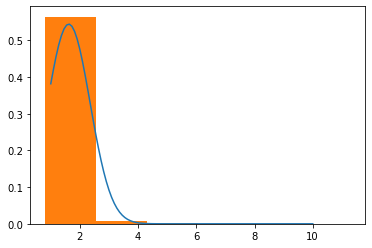

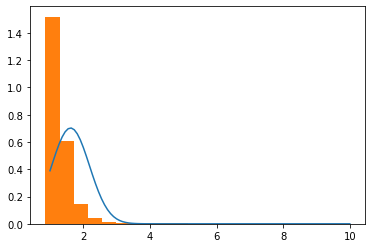

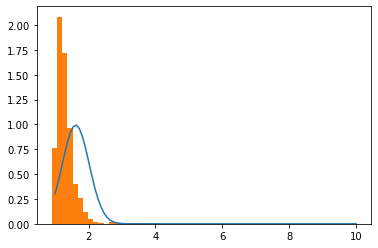

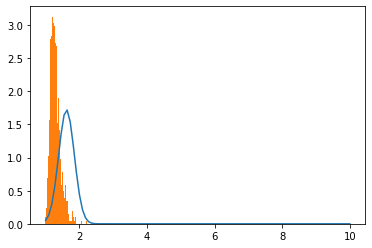

In [26]:
samples = []
for n in (3, 5, 10, 30):
    sample_n = []
    for i in range(1, 1001):
        n_variates = sts.pareto.rvs(b, scale=0.8, size=n)
        sample_n.append(n_variates.mean())
    samples.append(sample_n)
    #здесь квадрат стандартного отклонения равен \sigma^2/n 
    norm_rv = sts.norm(mean1, np.sqrt(var1/n))
    pdf_norm = norm_rv.pdf(x)
    plt.figure()    
    plt.plot(x, pdf_norm, label='Norm distribution of ' + str(n))
    plt.hist(sample_n, bins=n*2, density=True)
    
    # суть камента 
    #>> "Некрасиво :), лучше бы взял больше n." 
    # не понял. Брал разные коэффициенты при n, картинка меняется не сильно.

>Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Как было предсказано, распределение приближается к нормальному; 
Не могу нормально объяснить, что началось после 10 - пик нормального графика поехал высоко от гистограммы, 
вероятно, требуется аккуратный подбор колиества корзин